# TESTE PYTHON

ARTHUR LUCENA SILVA

Aplicação de técnicas em python com foco em averiguar o nível de conhecimento não só na ferramenta, como também em estatística.

**Base de dados**: "Ames Housing Dataset"

**Target**: SalePrice



**RESUMO**

1. Importando e instalando bibliotecas
    
    1.1 Carregando base de dados
    
    
2. Limpeza e tratamento dos dados


3. Análise exploratória
    
    3.1 Análise correlacional das variáveis
    
    3.2 Análise descritiva das variáveis categóricas
    
    3.3 Análise descritiva das variáveis numéricas
    
    3.4 Análise diagnóstica
    
    
4. Definição das variáveis


5. Estruturação do modelo

    5.1 Modelo de regressão linear


6. Conclusão


7. Referências


# 1. Importando e instalando bibliotecas

In [341]:
# Pacotes e bibliotecas
import os
import numpy as np 
import pandas as pd
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)
from matplotlib import pyplot as plt
import seaborn as sns
import random as rd
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, explained_variance_score, mean_absolute_error, mean_squared_error
from math import sqrt

%matplotlib inline

In [342]:
# Transformando números ciêntíficos em float
np.set_printoptions(formatter={'float_kind':'{:f}'.format})

# Padronizando o tamanho dos gráficos
sns.set(rc={'figure.figsize':(12,6)})

# 1.1 Carregando base de dados

In [344]:
# Loading the data
df = pd.read_csv('C:\\Users\\Tuta\\Documents\\Teste Bip\\TESTE\\base.csv')

# Dimensão da base
print(df.shape)

#rodando as primeiras 5 linhas
df.head()

(1460, 81)


,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [346]:
#Checando tipos das variáveis

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

# 2. Limpeza e tratamento dos dados

In [348]:
# Checando valores nulos

df.isnull().sum()

Id                  0
MSSubClass          0
MSZoning            0
LotFrontage       259
LotArea             0
Street              0
Alley            1369
LotShape            0
LandContour         0
Utilities           0
LotConfig           0
LandSlope           0
Neighborhood        0
Condition1          0
Condition2          0
BldgType            0
HouseStyle          0
OverallQual         0
OverallCond         0
YearBuilt           0
YearRemodAdd        0
RoofStyle           0
RoofMatl            0
Exterior1st         0
Exterior2nd         0
MasVnrType          8
MasVnrArea          8
ExterQual           0
ExterCond           0
Foundation          0
BsmtQual           37
BsmtCond           37
BsmtExposure       38
BsmtFinType1       37
BsmtFinSF1          0
BsmtFinType2       38
BsmtFinSF2          0
BsmtUnfSF           0
TotalBsmtSF         0
Heating             0
HeatingQC           0
CentralAir          0
Electrical          1
1stFlrSF            0
2ndFlrSF            0
LowQualFin

In [352]:
# Checando a porcentagem de valores nulos

total = df.isnull().sum().sort_values(ascending=False)
percent = (df.isnull().sum()/df.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total,percent],axis=1,keys=['Total','Percentual'])
missing_data.head(20)

,Total,Percentual
PoolQC,1453,0.995205
MiscFeature,1406,0.963014
Alley,1369,0.937671
Fence,1179,0.807534
FireplaceQu,690,0.472603
LotFrontage,259,0.177397
GarageYrBlt,81,0.055479
GarageCond,81,0.055479
GarageType,81,0.055479
GarageFinish,81,0.055479


Existem muitás variáveis que apresentam valores nulos, porém referem-se a ausência da categoria observada. Irei realizar o devido preenchimento das variáveis a seguir conforme **descrição da base de dados.pdf.**

    OBS- O valor embutido "None" de Python também é tratado como "NA" em arrays de objetos. (McKinney, 2018) 
    
   - Alley          -> NA = No alley access
   - PoolQC         -> NA = No pool
   - Fence          -> NA = No Fence
   - MiscFeature    -> NA = None
   - BsmtQual       -> NA = No basement
   - BsmtCond       -> NA = No basement
   - BsmtExposure   -> NA = No basement
   - BsmtFinType1   -> NA = No basement
   - BsmtFinType2   -> NA = No basement
   - GarageType     -> NA = No garage
   - GarageYrBlt(N) -> NA = None **Neste caso, não é necessário preenchimento a priori pois é uma coluna numérica**
   - GarageFinish   -> NA = No garage
   - GarageQual     -> NA = No garage
   - GarageCond     -> NA = No garage
   - FireplaceQu    -> NA = No fireplace

In [354]:
# Efetuando as devidas substituições

df["Alley"].fillna("No alley access", inplace = True)
df["PoolQC"].fillna("No pool", inplace = True)
df["Fence"].fillna("No Fence", inplace = True)
df["MiscFeature"].fillna("None", inplace = True)
df["BsmtQual"].fillna("No basement", inplace = True)
df["BsmtCond"].fillna("No basement", inplace = True)
df["BsmtExposure"].fillna("No basement", inplace = True)
df["BsmtFinType1"].fillna("No basement", inplace = True)
df["BsmtFinType2"].fillna("No basement", inplace = True)
df["GarageType"].fillna("No garage", inplace = True)
df["GarageFinish"].fillna("No garage", inplace = True)
df["GarageQual"].fillna("No garage", inplace = True)
df["GarageCond"].fillna("No garage", inplace = True)
df["FireplaceQu"].fillna("No fireplace", inplace = True)

# Dimensão da base
print(df.shape)

# Visualizando os valores nulos
df.isnull().sum()

(1460, 81)


Id                 0
MSSubClass         0
MSZoning           0
LotFrontage      259
LotArea            0
Street             0
Alley              0
LotShape           0
LandContour        0
Utilities          0
LotConfig          0
LandSlope          0
Neighborhood       0
Condition1         0
Condition2         0
BldgType           0
HouseStyle         0
OverallQual        0
OverallCond        0
YearBuilt          0
YearRemodAdd       0
RoofStyle          0
RoofMatl           0
Exterior1st        0
Exterior2nd        0
MasVnrType         8
MasVnrArea         8
ExterQual          0
ExterCond          0
Foundation         0
BsmtQual           0
BsmtCond           0
BsmtExposure       0
BsmtFinType1       0
BsmtFinSF1         0
BsmtFinType2       0
BsmtFinSF2         0
BsmtUnfSF          0
TotalBsmtSF        0
Heating            0
HeatingQC          0
CentralAir         0
Electrical         1
1stFlrSF           0
2ndFlrSF           0
LowQualFinSF       0
GrLivArea          0
BsmtFullBath 

Conseguimos eliminar as observações nulas de todas as colunas mencionadas anteriormente, porém **ainda restam algumas** colunas **categóricas** que contem missing values. Vamos analisar as seguintes colunas:

   - MasVnrType
   - Electrical

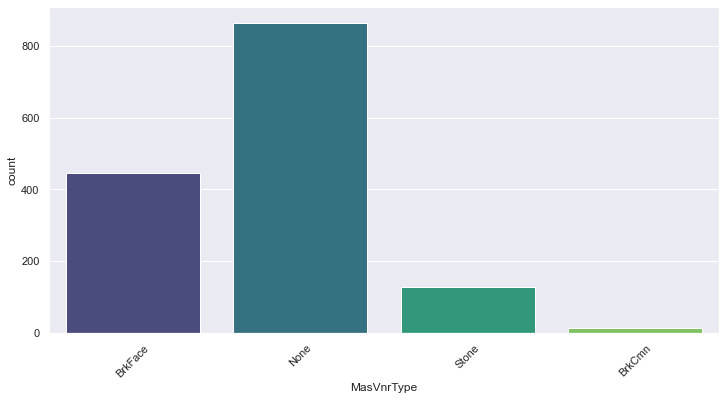

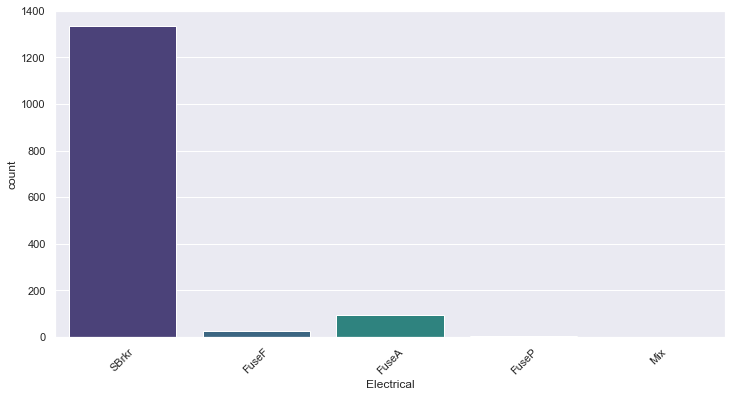

In [355]:
# Rodando as variáveis acima num counterplot para identificar a melhor forma de tratar os valores nulos

features = ['MasVnrType', 'Electrical']

for f in features:
    sns.countplot(x = f, data = df, palette = 'viridis')
    plt.xticks(rotation=45)
    plt.show()

Estou assumindo que:

- para os 8 valores NA da coluna "MasVnrType" são **"None".**
- para o valor único nulo da coluna "Electrical" é **"SBrkr", que seria o padrão conforme o descritivo da base.**

In [356]:
# Substituindo Null values por None na coluna "MasVnrType" 

df["MasVnrType"].fillna("None", inplace = True)
df["Electrical"].fillna("SBrkr", inplace = True)

# Dimensão da base
print(df.shape)

# Visualize the NULL observations
df.isnull().sum()

(1460, 81)


Id                 0
MSSubClass         0
MSZoning           0
LotFrontage      259
LotArea            0
Street             0
Alley              0
LotShape           0
LandContour        0
Utilities          0
LotConfig          0
LandSlope          0
Neighborhood       0
Condition1         0
Condition2         0
BldgType           0
HouseStyle         0
OverallQual        0
OverallCond        0
YearBuilt          0
YearRemodAdd       0
RoofStyle          0
RoofMatl           0
Exterior1st        0
Exterior2nd        0
MasVnrType         0
MasVnrArea         8
ExterQual          0
ExterCond          0
Foundation         0
BsmtQual           0
BsmtCond           0
BsmtExposure       0
BsmtFinType1       0
BsmtFinSF1         0
BsmtFinType2       0
BsmtFinSF2         0
BsmtUnfSF          0
TotalBsmtSF        0
Heating            0
HeatingQC          0
CentralAir         0
Electrical         0
1stFlrSF           0
2ndFlrSF           0
LowQualFinSF       0
GrLivArea          0
BsmtFullBath 

Conseguimos eliminar as observações nulas de todas as colunas mencionadas anteriormente, porém **ainda restam algumas** colunas **numéricas** que contem missing values. Vamos analisar as seguintes colunas:

   - MasVnrArea
   - LotFrontage

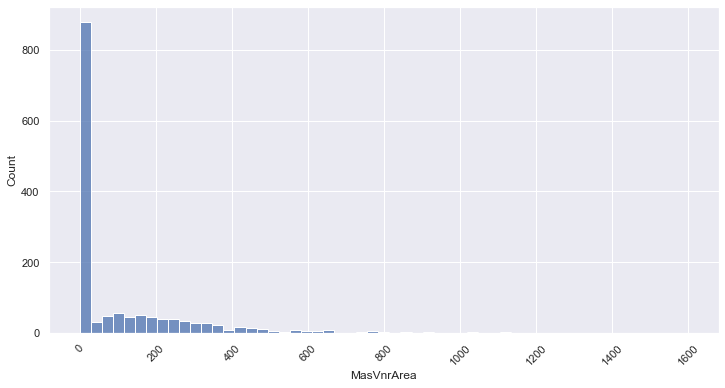

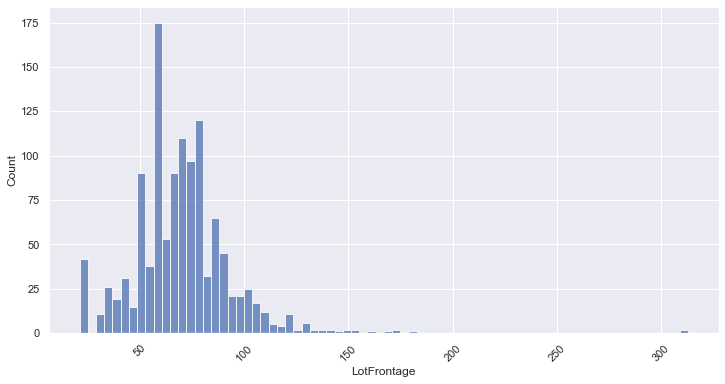

In [357]:
# Rodando as variáveis acima num histograma para identificar a melhor forma de tratar os valores nulos

features = ['MasVnrArea', 'LotFrontage']

for f in features:
    sns.histplot(x = f, data = df)
    plt.xticks(rotation=45)
    plt.show()

In [358]:
# Analisando a distribuição de LotFrontage

df['LotFrontage'].describe()

count    1201.000000
mean       70.049958
std        24.284752
min        21.000000
25%        59.000000
50%        69.000000
75%        80.000000
max       313.000000
Name: LotFrontage, dtype: float64

Estou assumindo que:

- para os 8 valores nulos da coluna "MasVnrArea" vou considerar a moda que é **"0.0".**
- para os 244 valores nulos da coluna "LotFrontage" serão **substituídos por valores inteiros e aleatórios entre "59" e "80"**, identificados na distribuição da variável para que sejamos fiel a média sem distorcer "tanto" o resultado, pode variar um pouco na parte estatística toda vez que o código for rodado, mas o intervalo é fiel em relação a média.

In [359]:
# Substituindo Null values por None na coluna "MasVnrArea" 

df["MasVnrArea"].fillna(0.0, inplace = True)
df["LotFrontage"].fillna(rd.randint(59.0, 80.0), inplace = True)

# Dimensão da base
print(df.shape)

# Visualize the NULL observations
df.isnull().sum()

(1460, 81)


Id                0
MSSubClass        0
MSZoning          0
LotFrontage       0
LotArea           0
Street            0
Alley             0
LotShape          0
LandContour       0
Utilities         0
LotConfig         0
LandSlope         0
Neighborhood      0
Condition1        0
Condition2        0
BldgType          0
HouseStyle        0
OverallQual       0
OverallCond       0
YearBuilt         0
YearRemodAdd      0
RoofStyle         0
RoofMatl          0
Exterior1st       0
Exterior2nd       0
MasVnrType        0
MasVnrArea        0
ExterQual         0
ExterCond         0
Foundation        0
BsmtQual          0
BsmtCond          0
BsmtExposure      0
BsmtFinType1      0
BsmtFinSF1        0
BsmtFinType2      0
BsmtFinSF2        0
BsmtUnfSF         0
TotalBsmtSF       0
Heating           0
HeatingQC         0
CentralAir        0
Electrical        0
1stFlrSF          0
2ndFlrSF          0
LowQualFinSF      0
GrLivArea         0
BsmtFullBath      0
BsmtHalfBath      0
FullBath          0


In [360]:
# Investigando os elementos de cada variável

for column in df:
    unique_vals = np.unique(df[column])
    nr_values = len(unique_vals)
    if nr_values < 16:
        print('The number of values for feature {} :{} -- {}'.format(column, nr_values,unique_vals))
    else:
        print('The number of values for feature {} :{}'.format(column, nr_values))

The number of values for feature Id :1460
The number of values for feature MSSubClass :15 -- [ 20  30  40  45  50  60  70  75  80  85  90 120 160 180 190]
The number of values for feature MSZoning :5 -- ['C (all)' 'FV' 'RH' 'RL' 'RM']
The number of values for feature LotFrontage :110
The number of values for feature LotArea :1073
The number of values for feature Street :2 -- ['Grvl' 'Pave']
The number of values for feature Alley :3 -- ['Grvl' 'No alley access' 'Pave']
The number of values for feature LotShape :4 -- ['IR1' 'IR2' 'IR3' 'Reg']
The number of values for feature LandContour :4 -- ['Bnk' 'HLS' 'Low' 'Lvl']
The number of values for feature Utilities :2 -- ['AllPub' 'NoSeWa']
The number of values for feature LotConfig :5 -- ['Corner' 'CulDSac' 'FR2' 'FR3' 'Inside']
The number of values for feature LandSlope :3 -- ['Gtl' 'Mod' 'Sev']
The number of values for feature Neighborhood :25
The number of values for feature Condition1 :9 -- ['Artery' 'Feedr' 'Norm' 'PosA' 'PosN' 'RRAe' '

# 3. Análise exploratória

A nossa target feature é "SalesPrice" portanto faremos um estudo correlacional, em seguida uma análise descritiva, depois uma diagnóstica das variáveis para identificar aquelas que possuem uma correlação com o target e descartaremos aquelas que não são úteis.

In [361]:
# Dados estatísticos das variáveis numericas

df.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1379.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.573288,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.117123,443.639726,46.549315,567.240411,1057.429452,1162.626712,346.992466,5.844521,1515.463699,0.425342,0.057534,1.565068,0.382877,2.866438,1.046575,6.517808,0.613014,1978.506164,1.767123,472.980137,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,22.052855,9981.264932,1.382997,1.112799,30.202904,20.645407,180.731373,456.098091,161.319273,441.866955,438.705324,386.587738,436.528436,48.623081,525.480383,0.518911,0.238753,0.550916,0.502885,0.815778,0.220338,1.625393,0.644666,24.689725,0.747315,213.804841,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,0.000000,0.000000,334.000000,0.000000,0.000000,334.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,1900.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,60.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,0.000000,223.000000,795.750000,882.000000,0.000000,0.000000,1129.500000,0.000000,0.000000,1.000000,0.000000,2.000000,1.000000,5.000000,0.000000,1961.000000,1.000000,334.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,73.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,0.000000,477.500000,991.500000,1087.000000,0.000000,0.000000,1464.000000,0.000000,0.000000,2.000000,0.000000,3.000000,1.000000,6.000000,1.000000,1980.000000,2.000000,480.000000,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,79.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,164.250000,712.250000,0.000000,808.000000,1298.250000,1391.250000,728.000000,0.000000,1776.750000,1.000000,0.000000,2.000000,1.000000,3.000000,1.000000,7.000000,1.000000,2002.000000,2.000000,576.000000,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,1474.000000,2336.000000,6110.000000,4692.000000,2065.000000,572.000000,5642.000000,3.000000,2.000000,3.000000,2.000000,8.000000,3.000000,14.000000,3.000000,2010.000000,4.000000,1418.000000,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [363]:
# Analisando somente o target

df['SalePrice'].describe()

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

C:\Users\Tuta\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


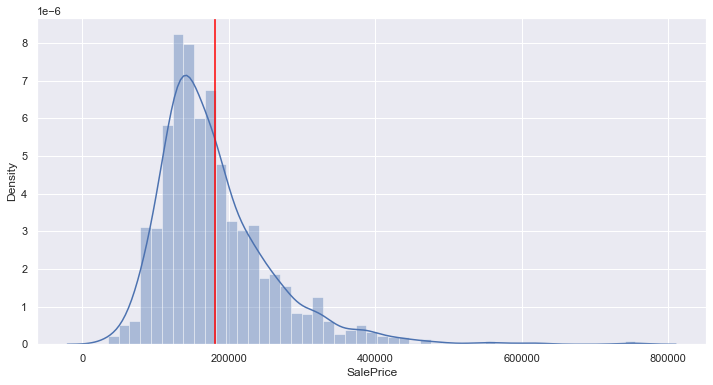

In [364]:
# Histograma

sns.distplot(df['SalePrice'])

# Calculando a média

media = df['SalePrice'].mean()

# Plotando a média
plt.axvline(media, 0,1, color = 'red')

In [366]:
# Skewness/Assimetria e Kurtosis/Custose

print("Assimetria: %f" % df['SalePrice'].skew())
print("Curtose: %f" % df['SalePrice'].kurt())

Assimetria: 1.882876
Curtose: 6.536282


**Sobre a distribuição da variável target** Distribuição assimetrica positiva

**Skewness/Assimetria**: Uma distribuição com um valor de **curtose negativa** indica que a distribuição tem caudas mais leves do que a distribuição normal. Uma distribuição com um valor de **curtose positiva** indica que a distribuição tem caudas mais pesadas do que a distribuição normal.

**Kurtosis/Curtose**: Uma **Assimetria negativa** significa que a cauda da curva da distribuição declina para esquerda (curva C). Em geral, a média é menor que a mediana. **Assimetria positiva** a cauda da curva da distribuição declina para direita (curva A). Em geral, a média é maior que a mediana.

Para mais informações: https://www.itl.nist.gov/div898/handbook/eda/section3/eda35b.htm

In [367]:
# Registrando as variáveis para copiar e colar com mais facilidade

df.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType', 'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond', 'PavedDrive', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea',
  

# 3.1 Análise correlacional das variáveis

<AxesSubplot:>

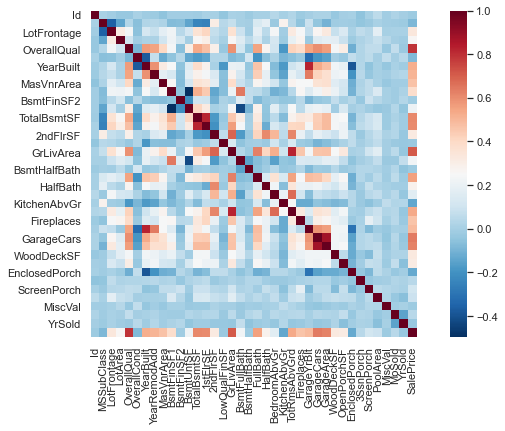

In [368]:
df_co = df.corr()
sns.color_palette("viridis", as_cmap=True)
sns.heatmap(df_co,cmap='RdBu_r',square = True)

A corr() é frequentemente usada para para avaliar a correlação das colunas de um dataframe. Quanto mais próximo de -1 ou +1 melhor.

Index(['OverallQual', 'YearBuilt', 'YearRemodAdd', 'TotalBsmtSF', '1stFlrSF', 'GrLivArea', 'FullBath', 'TotRmsAbvGrd', 'GarageCars', 'GarageArea', 'SalePrice'], dtype='object')

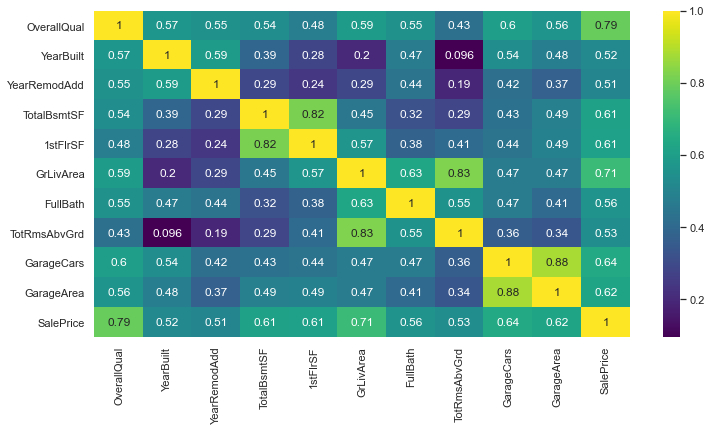

In [369]:
# Identificando as variáveis mais com "SalePrice"

df_co = df.corr()
top_corr_features = df_co.index[abs(df_co['SalePrice'])>0.5]
sns.heatmap(df[top_corr_features].corr(),cmap='viridis',annot = True);
top_corr_features

A partir da correlação destacada em relação a variável "SalePrice", vamos trabalhar somente com as variáveis **TOP** (Aquela com índice de correlação maior do que 0.5 **em módulo**, e descartar as demais neste primeiro momento.

In [370]:
top_features = ['OverallQual', 'YearBuilt', 'YearRemodAdd', 'TotalBsmtSF', '1stFlrSF', 'GrLivArea', 'FullBath', 'TotRmsAbvGrd',
                'GarageCars', 'GarageArea', 'SalePrice']

# 3.2 Análise descritiva das variáveis categóricas

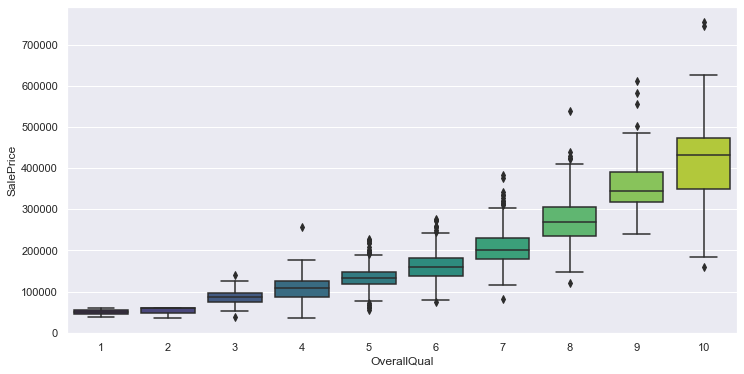

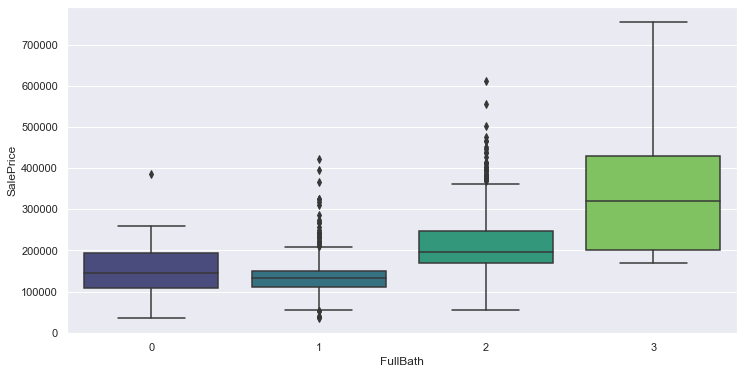

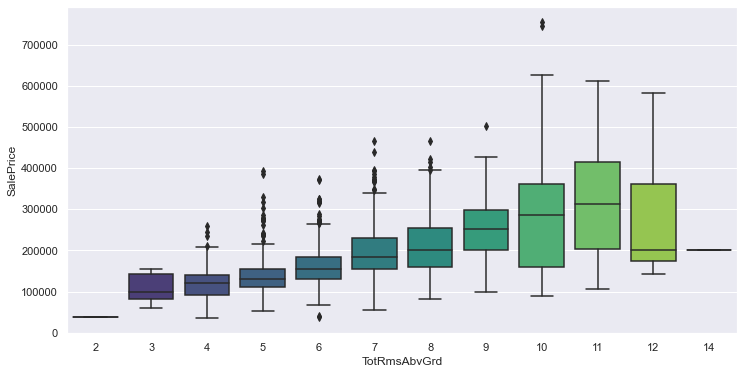

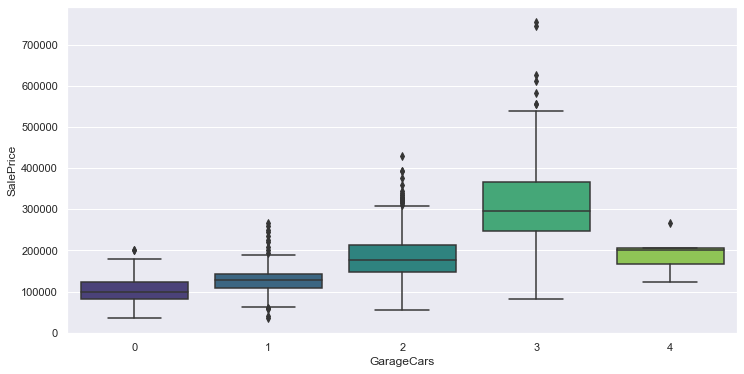

In [371]:
# Rodando as variáveis categóricas num scatterplot para avaliar a relação com "SalesPrice"

features_cat = ['OverallQual', 'FullBath', 'TotRmsAbvGrd','GarageCars']

for f in features_cat:
    sns.boxplot(x = f, y = 'SalePrice', data = df, palette = 'viridis')
    plt.xticks(rotation=0)
    plt.show()

# 3.3 Análise descritiva das variáveis numéricas

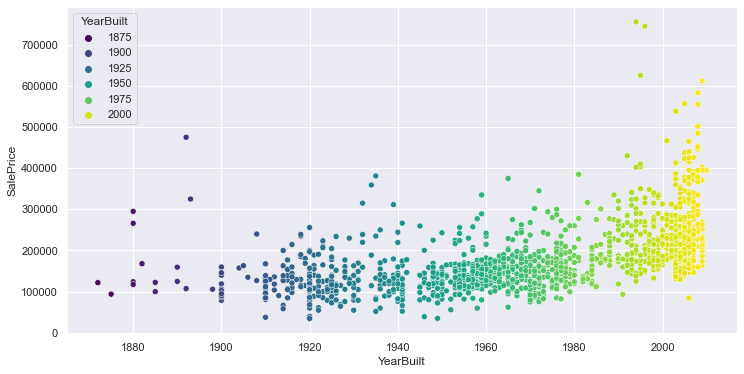

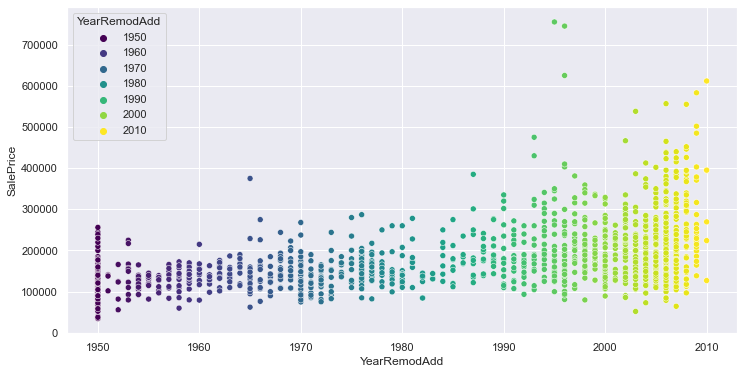

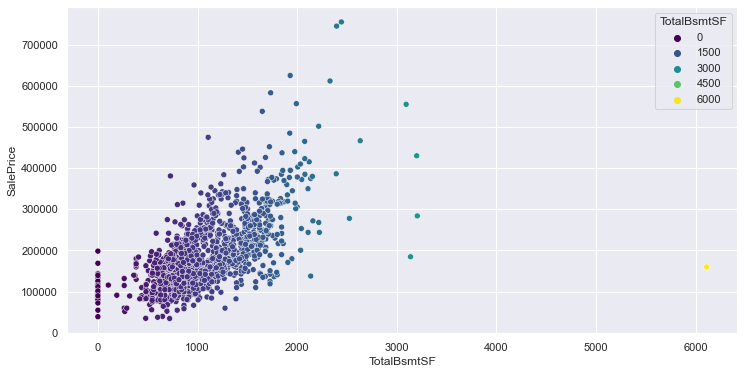

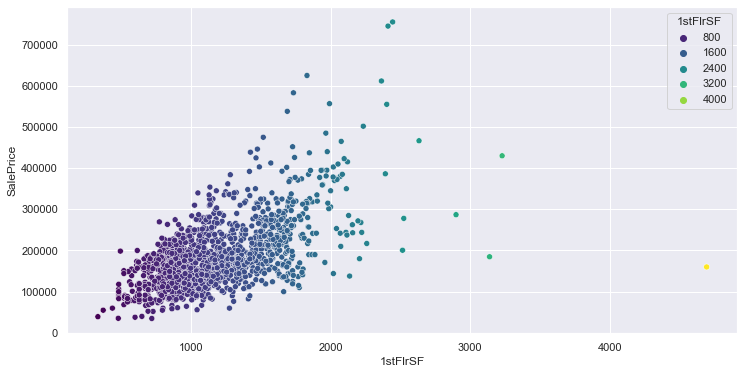

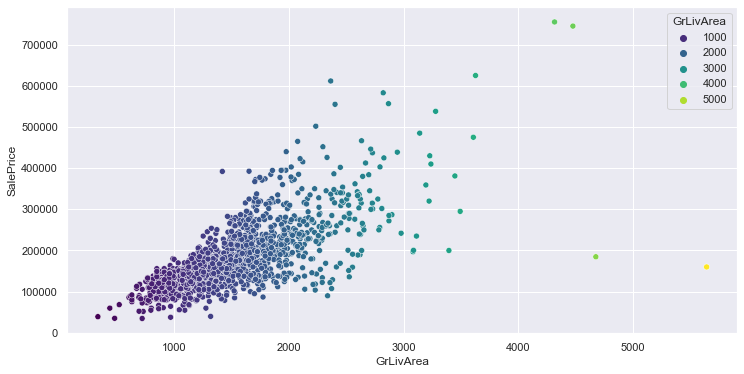

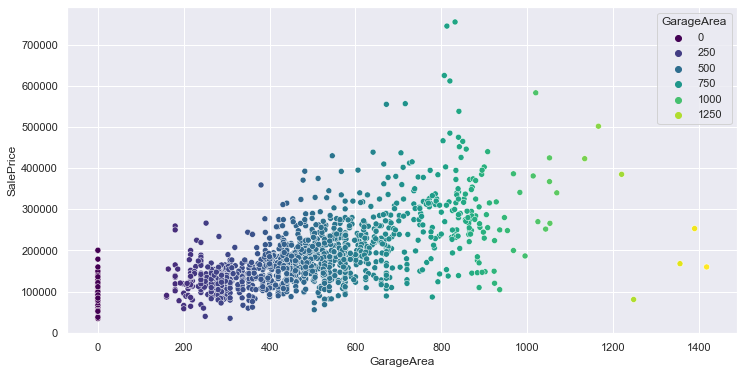

In [372]:
# Rodando as variáveis numéricas num scatterplot para avaliar a relação com "SalesPrice"

features_num = ['YearBuilt','YearRemodAdd','TotalBsmtSF','1stFlrSF','GrLivArea', 'GarageArea']

for f in features_num:
    sns.scatterplot(x = f, y = 'SalePrice', data = df, palette = 'viridis', hue = f)
    plt.xticks(rotation=0)
    plt.show()

# 3.4 Análise diagnóstica

Algumas features demonstraram alta Correlação, cabendo uma investigação mais aprofundada para observar como se comportam em relação ao target. As análises serão:

- OverallQual com GarageCars e GrLivArea;
- GrLivArea com TotRmsAbvGrd e FullBath;
- GarageCars com GarageArea;
- TotalBsmtSF com 1stFlrSF;
- SalePrice com YearRemodAdd.


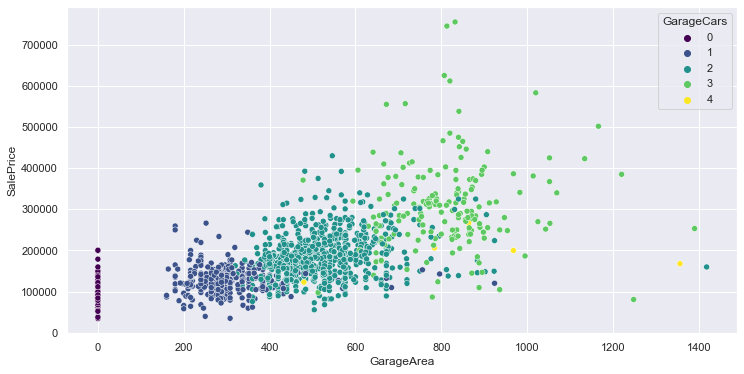

In [373]:
# Entendendo a relação entre "GarageArea" com "GarageCars".

sns.scatterplot(x ='GarageArea', y ='SalePrice', hue = 'GarageCars' ,data = df,palette = 'viridis')
plt.xticks(rotation=0)
plt.show()

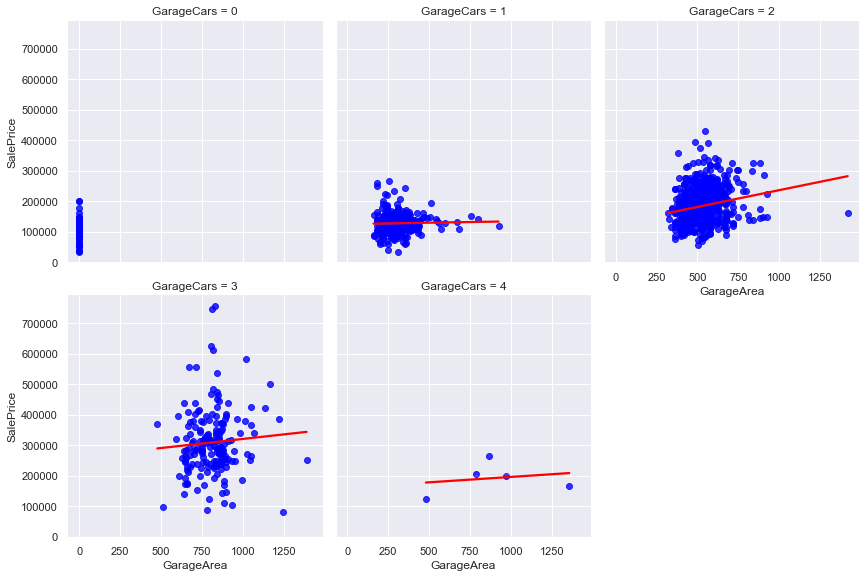

In [374]:
# Entendendo a relação entre "OverallQual" com "GarageCars"

ax = sns.lmplot(x="GarageArea", y="SalePrice", data=df, col = 'GarageCars', ci= True, height=4, 
                line_kws={'color': 'red'}, 
                scatter_kws={'color':'blue'},
                col_wrap=3,
                x_jitter=.3)

#1 A relação entre o aumento da área da garagem com o aumento da capacidade de carros na garagem é cartesiana, contudo ela não influencia tanto no preço pois existe uma superdispersão em relação a área da garagem e a quantidade de carros suportados. Vale ressaltar que não temos a dimensão dos carros para investigar mais sobre essa questão, contudo é uma questão que precisa de mais detalhamento.

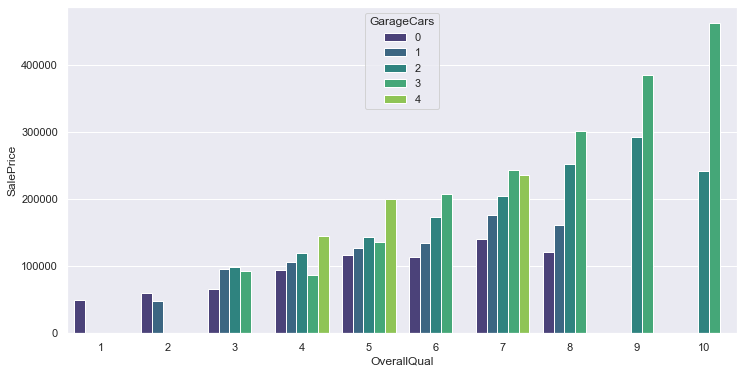

In [375]:
ax = sns.barplot(x="OverallQual", y="SalePrice", data=df, hue = 'GarageCars', ci= False, palette = 'viridis')

#2 Quanto maior o número da capacidade dos carros na garagem, maior a nota. Os lugares que não possuem garagem, são mais desvalorizados;

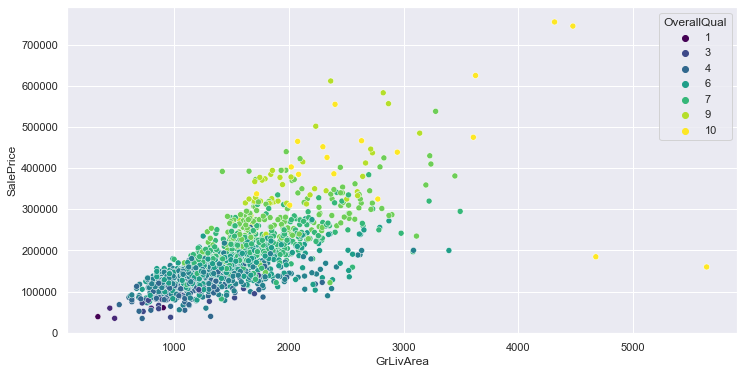

In [376]:
# Entendendo a relação entre "GrLivArea" com "OverallQual".

sns.scatterplot(x ='GrLivArea', y ='SalePrice', hue = 'OverallQual' ,data = df,palette = 'viridis')
plt.xticks(rotation=0)
plt.show()

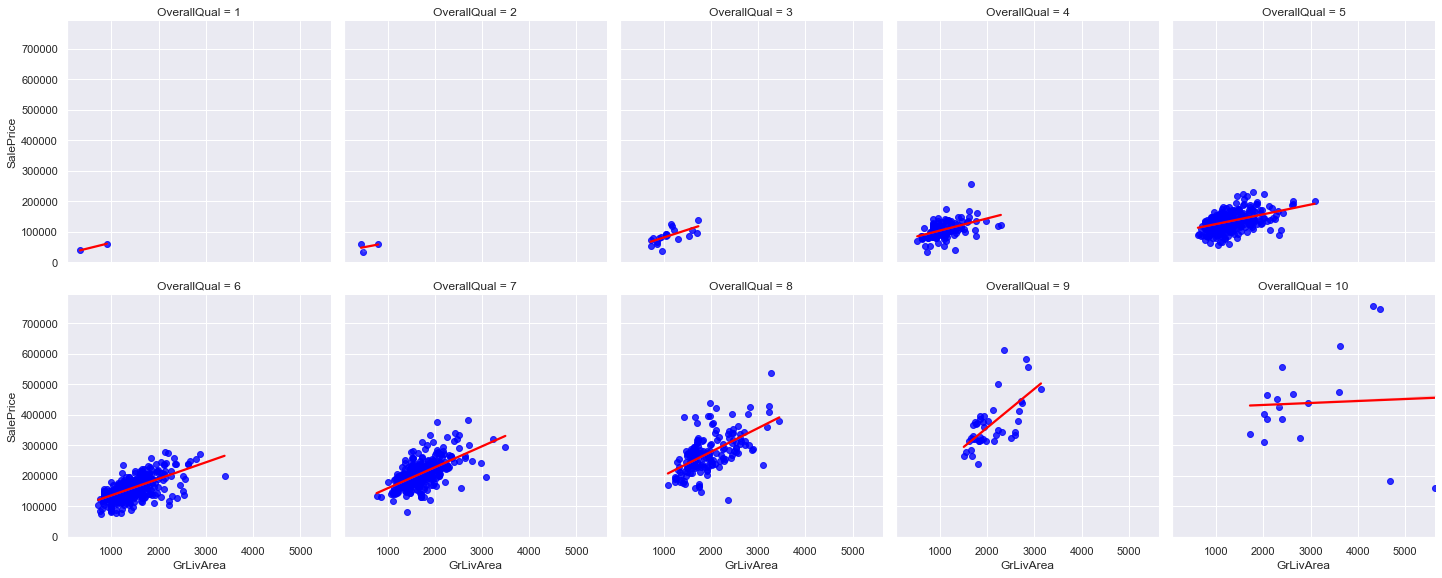

In [377]:
ax = sns.lmplot(x="GrLivArea", y="SalePrice", data=df, col = 'OverallQual', ci= True, height=4, 
                line_kws={'color': 'red'}, 
                scatter_kws={'color':'blue'},
                col_wrap=5,
                x_jitter=.3)

#3 A maior concentração das notas está entre 4 e 8, fora deste intervalo temos uma concentração mais baixa. Para as notas 1,2 e 10 é dificil afirmar que o modelo poderá ser acurado, uma vez que para as notas 1 e 2 temos pouquíssimos casos, e para a nota 10 temos alguns outliers. Para ajustar melhor o nosso modelo, irei eliminar os outliers existentes na nota 10, que teriam o **preço abaixo de 200.000,00.**

In [378]:
# Averiguando os outliers

df.query('OverallQual == 10 & SalePrice <200000')

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
523,524,60,RL,130.0,40094,Pave,No alley access,IR1,Bnk,AllPub,Inside,Gtl,Edwards,PosN,PosN,1Fam,2Story,10,5,2007,2008,Hip,CompShg,CemntBd,CmentBd,Stone,762.0,Ex,TA,PConc,Ex,TA,Gd,GLQ,2260,Unf,0,878,3138,GasA,Ex,Y,SBrkr,3138,1538,0,4676,1,0,3,1,3,1,Ex,11,Typ,1,Gd,BuiltIn,2007.0,Fin,3,884,TA,TA,Y,208,406,0,0,0,0,No pool,No Fence,None,0,10,2007,New,Partial,184750
1298,1299,60,RL,313.0,63887,Pave,No alley access,IR3,Bnk,AllPub,Corner,Gtl,Edwards,Feedr,Norm,1Fam,2Story,10,5,2008,2008,Hip,ClyTile,Stucco,Stucco,Stone,796.0,Ex,TA,PConc,Ex,TA,Gd,GLQ,5644,Unf,0,466,6110,GasA,Ex,Y,SBrkr,4692,950,0,5642,2,0,2,1,3,1,Ex,12,Typ,3,Gd,Attchd,2008.0,Fin,2,1418,TA,TA,Y,214,292,0,0,0,480,Gd,No Fence,None,0,1,2008,New,Partial,160000


In [379]:
# Deletando os outliers

index = df[(df['OverallQual'] == 10) & (df['SalePrice'] < 200000)].index
df.drop(index, inplace=True)

print(df.shape)

(1458, 81)


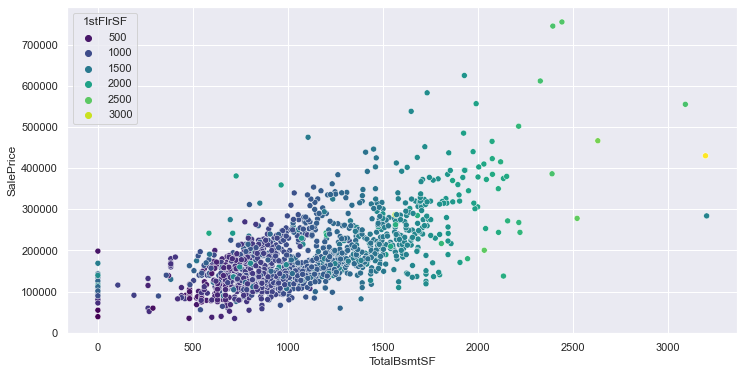

In [380]:
# Entendendo a relação entre "TotalBsmtSF" com "1stFlrSF"

sns.scatterplot(x ='TotalBsmtSF', y ='SalePrice', hue = '1stFlrSF' ,data = df,palette = 'viridis')
plt.xticks(rotation=0)
plt.show()

#4 A medida que se aumenta a área do porão percebe-se um incremento do preço. Como ambas são medidas de área, sua relação já era esperada, porém o gráfico mostra uma certa dispersão.

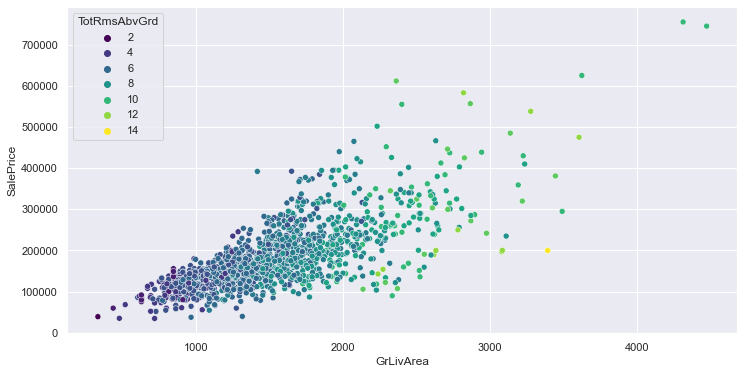

In [381]:
# Entendendo a relação entre "GrLivArea" e "TotRmsAbvGrd"

sns.scatterplot(x ='GrLivArea', y ='SalePrice', hue = 'TotRmsAbvGrd' ,data = df,palette = 'viridis')
plt.xticks(rotation=0)
plt.show()

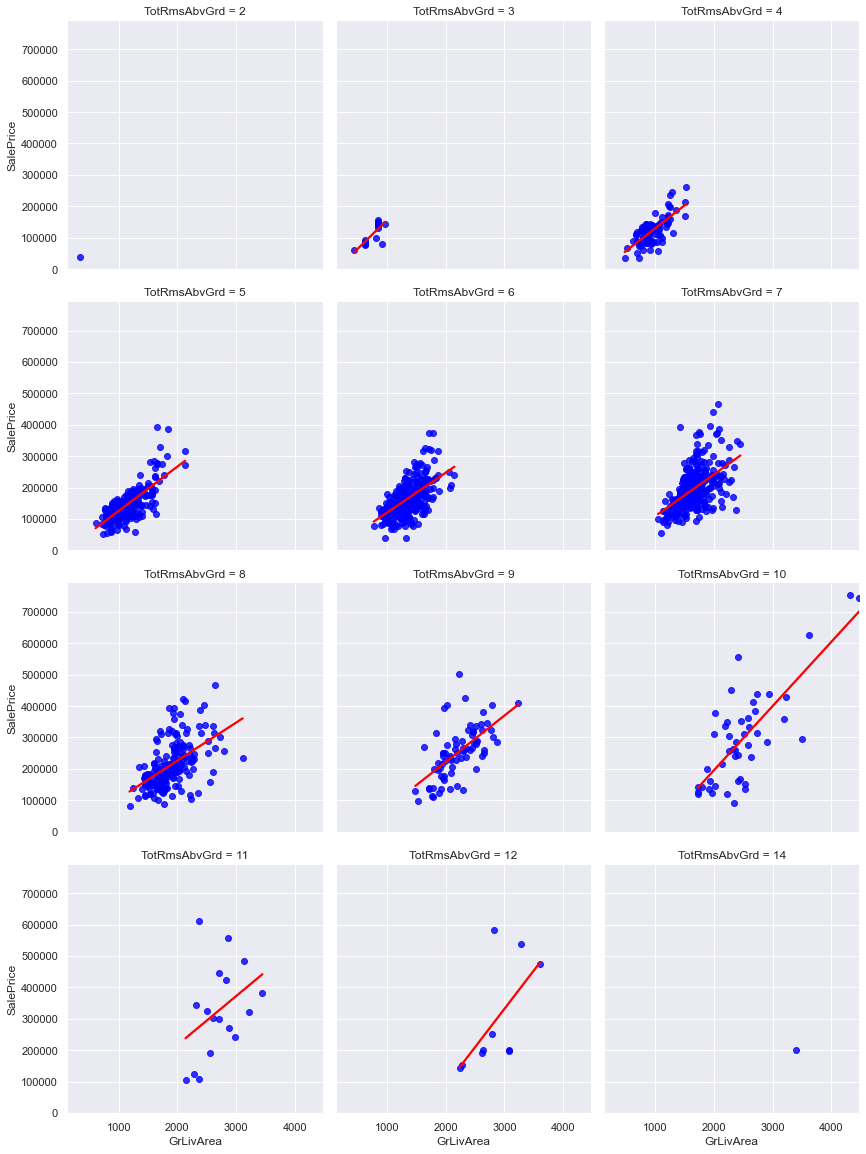

In [382]:
ax = sns.lmplot(x="GrLivArea", y="SalePrice", data=df, col = 'TotRmsAbvGrd', ci= True, height=4, 
                line_kws={'color': 'red'}, 
                scatter_kws={'color':'blue'},
                col_wrap=3,
                x_jitter=.3)

#5 Embora tenha-se notado alguns outliers o ajuste da curva não foi muito "agredido". Percebe-se de forma clara que conforme aumenta-se o número total de quartos, aumenta-se não só o preço, como também o tamanho da área de convivência.

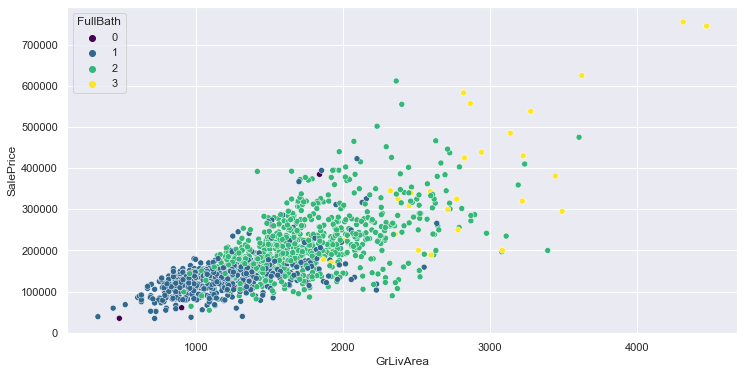

In [383]:
# Entendendo a relação entre "FullBath" com "GrLivArea".

sns.scatterplot(x ='GrLivArea', y ='SalePrice', hue = 'FullBath' ,data = df,palette = 'viridis')
plt.xticks(rotation=0)
plt.show()

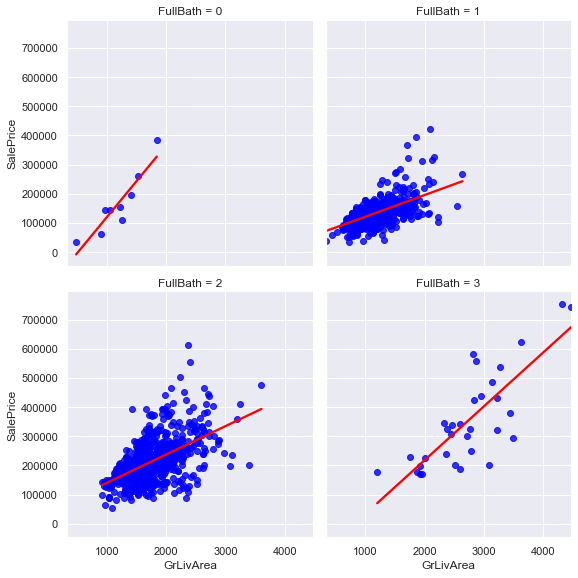

In [384]:
ax = sns.lmplot(x="GrLivArea", y="SalePrice", data=df, col = 'FullBath', ci= True, height=4, 
                line_kws={'color': 'red'}, 
                scatter_kws={'color':'blue'},
                col_wrap=2,
                x_jitter=.3)

#6 Embora tenha-se notado alguns outliers o ajuste da curva não foi muito "agredido". Percebe-se de forma clara que conforme aumenta-se o número total de banheiros, aumenta-se não só o preço, como também o tamanho da área de convivência, contudo vale ressaltar que para os casos onde não há banheiro, a curva mostra-se bastante acentuada que pode estar ligada a outros fatores.

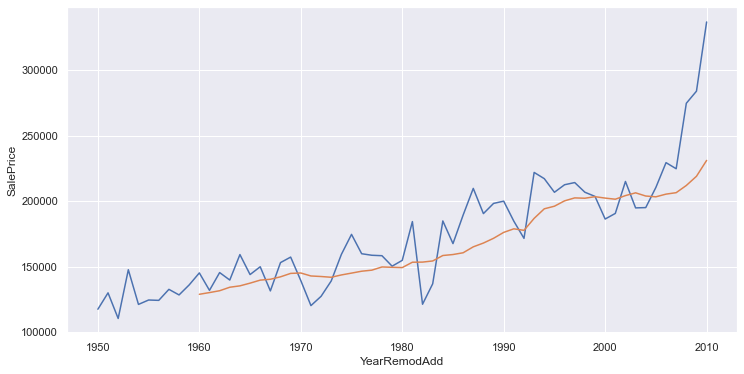

In [385]:
# Entendendo a relação do aumento do "SalePrice" em função do tempo a partir da média móvel com base nos primeiros 10 anos

p = pd.DataFrame(df.groupby('YearRemodAdd')['SalePrice'].mean())

# Calculando a média móvel do "SalePrice"

p['MM'] = p['SalePrice'].rolling(11).mean()

# Plotando MD(Média) e MM(Média Móvel)

MD = sns.lineplot(x='YearRemodAdd', y='SalePrice', data = p, ci=None, markers=True)
MM = sns.lineplot(x='YearRemodAdd', y='MM', data = p, ci=None, markers=True)

#7 Com o passar dos anos a média móvel das moradias cresceu quase que de forma constante.

# 4. Definição das variáveis

Conforme as investigações, foram definidas as seguintes variáveis para estruturar o modelo, de acordo com as descrições abaixo:

- OverallQual: Apresenta uma nota geral sobre as condições da moradia, que contém uma bagagem rica de informações da base de dados;

- YearRemodAdd: O ano é um fator importante, uma vez que o imóvel novo pode possuir materiais cada vez mais seguros, e caros. O que acaba valorizando o preço de venda da moradia.

- TotalBsmtSF: Quanto maior for a quantidade total da área do porão, mais valorizado é a moradia;

- FullBath: Quanto mais banheiros, mais valorizado é a moradia;

- TotRmsAbvGrd: Quanto mais quartos, mais valorizado é a moradia;

- GarageCars: Quanto maior for a capacidade da garagem, mais valorizado é a moradia;

- GrLivArea: Quanto maior for a área de convivência da moradia, mais valorizado é a moradia;

-OBS: **Quanto maior a área total, mais caro é a moradia. Pode haver variação do preço a depender de fatores como acesso a transporte, lojas de conveniência e etc. Porém os dados mostram que quanto maio for a área da moradia, maior o preço.**

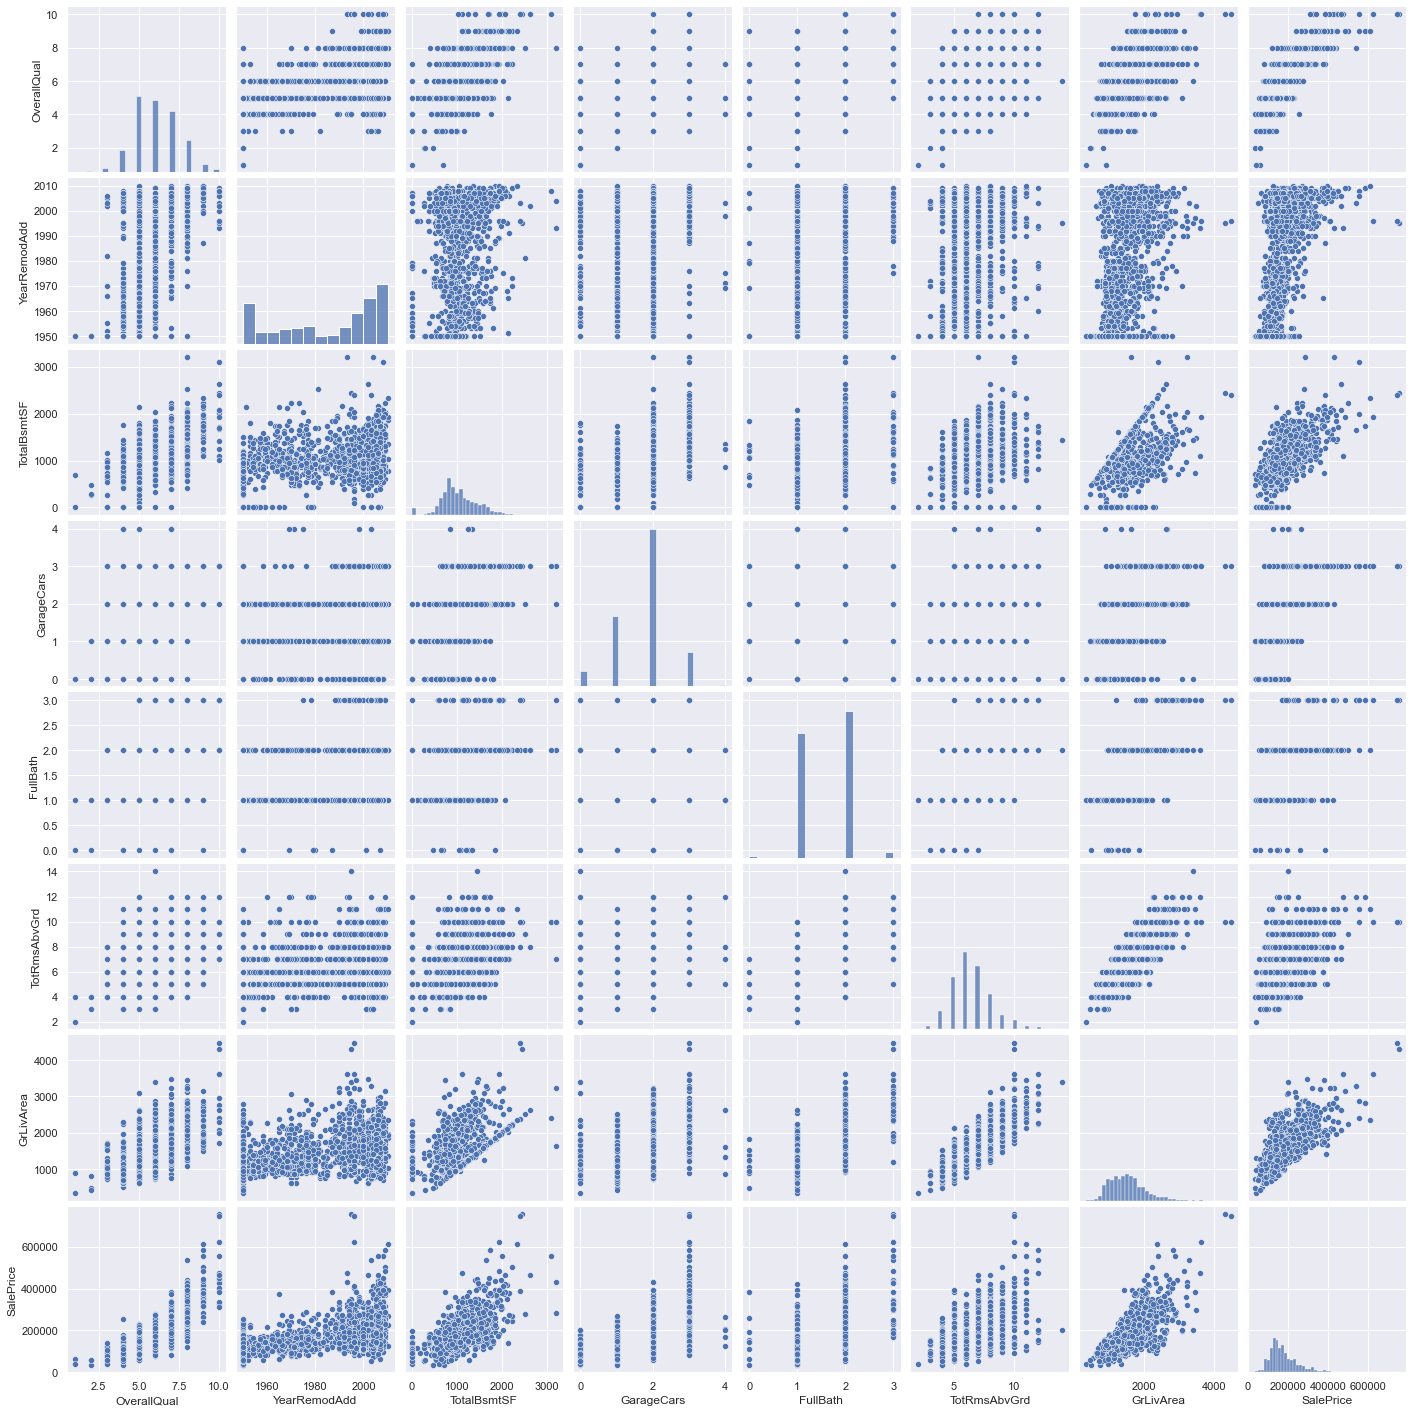

In [386]:
# Visualizando as variáveis escolhidas através do Pairplot

# Notes: Do not run this on a big dataset. Filter the columns first

g = sns.pairplot(df[['OverallQual','YearRemodAdd','TotalBsmtSF','GarageCars','FullBath','TotRmsAbvGrd','GrLivArea',
                     'SalePrice']])

In [387]:
# Filtrando o dataset somente para as variáveis escolhidas

df_final = df[['OverallQual','YearRemodAdd','TotalBsmtSF','GarageCars','FullBath','TotRmsAbvGrd','GrLivArea','SalePrice']]

# Visualizando o dataset
df_final.head()

,OverallQual,YearRemodAdd,TotalBsmtSF,GarageCars,FullBath,TotRmsAbvGrd,GrLivArea,SalePrice
0,7,2003,856,2,2,8,1710,208500
1,6,1976,1262,2,2,6,1262,181500
2,7,2002,920,2,2,6,1786,223500
3,7,1970,756,3,1,7,1717,140000
4,8,2000,1145,3,2,9,2198,250000


**Não há a necessidade de transformar nenhuma variável pois são todas numéricas**

# 5. Estruturação do modelo

In [388]:
# Dividindo o dataset para o modelo

X = df_final.drop('SalePrice', axis = 1).values

#Vamos usar o X2 para nossas predições

X2 = df_final.drop('SalePrice', axis = 1)
y = df_final['SalePrice']

print(X.shape)
print(y.shape)

X

(1458, 7)
(1458,)


array([[   7, 2003,  856, ...,    2,    8, 1710],
       [   6, 1976, 1262, ...,    2,    6, 1262],
       [   7, 2002,  920, ...,    2,    6, 1786],
       ...,
       [   7, 2006, 1152, ...,    2,    9, 2340],
       [   5, 1996, 1078, ...,    1,    5, 1078],
       [   5, 1965, 1256, ...,    1,    6, 1256]], dtype=int64)

In [389]:
# Rodando uma decision tree para estimação (i.e. decision trees & random forests)

dt = DecisionTreeClassifier(random_state=15, criterion  = 'entropy', max_depth = 10)
dt.fit(X,y)

DecisionTreeClassifier(criterion='entropy', max_depth=10, random_state=15)

A árvore de decisão foi calculada com foco na redução de entropia, que procura balancear a informação para garantir maior qualidade nos dados.

- Para mais informações sobre decision tree: https://www.datacamp.com/community/tutorials/decision-tree-classification-python
- Doc Oficial: https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html

In [390]:
# Importância das variáveis conforme a decision tree

for i, column in enumerate(df_final.drop('SalePrice', axis = 1)):
    print('The feature importance for {} is: {:.3f}'.format(column, dt.feature_importances_[i]))

The feature importance for OverallQual is: 0.150
The feature importance for YearRemodAdd is: 0.181
The feature importance for TotalBsmtSF is: 0.272
The feature importance for GarageCars is: 0.050
The feature importance for FullBath is: 0.012
The feature importance for TotRmsAbvGrd is: 0.050
The feature importance for GrLivArea is: 0.286


Segundo a árvore de decisão a variável mais importante para estimar o preço é **GrLivArea**, seguida da **TotalBsmtSF**. Juntas correspondem a mais de 55% da previsão. Vamos averiguar se o modelo linear segue esta mesma linha.

In [391]:
# Definindo a proproção de dados para teste e dados para treino

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.70, test_size = 0.3, random_state=15)

print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(1020, 7)
(438, 7)
(1020,)
(438,)


A Literatura indica uma divisão entre 70% para treino e 30% para teste. Não é uma regra obrigatória, mas é a mais comumente usada pelos data cientistas (Müller e Guido, 2018)

Para mais informações dos parâmetros usados, segue Documento Oficial:
https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html

# 5.1 Modelo de regressão linear

In [392]:
# Treinando o modelo

lm = LinearRegression(fit_intercept = True)
lm.fit(X_train, y_train)

y_pred = lm.predict(X_train)

Para mais informações dos parâmetros usados, segue Documento Oficial:
https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html

**Avaliando o Modelo**

In [393]:
# Acuracidade do modelo de treino

print('A acurácia  do modelo de treino é de: ', lm.score(X_train, y_train) )
print('A acurácia R² do modelo de treino é de: ',r2_score(y_train,y_pred) )   

print("")
# Acuracidade do modelo de teste
print('A acurácia do modelo de teste é de: ', lm.score(X_test, y_test) )

print("")
# The Root Mean Squared Error/O desvio médio quadrático (RMSE)
print('O RMSE do modelo de treino é de: ',sqrt(mean_squared_error(y_train,y_pred)))
print('O RMSE do modelo de teste é de: ',sqrt(mean_squared_error(y_test,lm.predict(X_test))))

print("")
# The Mean Absolute Error/O erro absoluto médio (MAE)
print('O MAE do modelo de treino é de: ',mean_absolute_error(y_train,y_pred))
print('O MAE do modelo de teste é de: ',mean_absolute_error(y_test,lm.predict(X_test)))


print("")

# Coeficientes
print('Coeficientes: ', lm.coef_ )

print("")
# The Interceptação
print('Interceptação: ', lm.intercept_)

A acurácia  do modelo de treino é de:  0.8159647267905192
A acurácia R² do modelo de treino é de:  0.8159647267905192

A acurácia do modelo de teste é de:  0.8043950830539184

O RMSE do modelo de treino é de:  34299.02901210385
O RMSE do modelo de teste é de:  34632.092704592076

O MAE do modelo de treino é de:  24035.37128222892
O MAE do modelo de teste é de:  23603.26738400372

Coeficientes:  [18431.325721 440.091598 43.608070 13989.004121 -5811.576589 -3231.560725
 68.798311]

Interceptação:  -949079.7763485267


- O modelo confecionado tem capacidade de explicar aproximadamente **82% dos dados de treino** e **81% dos dados de teste.** 
- O modelo confecionado se aproxima da linha preditora gerada em aproximadamente **82% (R²).**

- O RMSE do modelo dos dados de teste e dos dados de treino esta aceitável para os padrões do modelo, indicando um desvio médio na casa dos 34 mil, que equivale a dizer que a previsão do preço da moradia pode variar entre +- aproximadamente 35.000,00.

- O MAE do modelos também apresenta um resultado coerente para os padrões do modelo, indicando que o erro absoluto médio estaria na casa dos 24 mil, que equivale a dizer que a média absoluta da diferença entre o preço atual e o preço previsto é de aproximadamente 24.000,00.

- Os coeficientes são os pesos que cada variável que definimos possui na equação linear.

- A interceptação é a média do preço para Y quando X for igual a 0, em outras palavras, para uma moradia de preço igual a 0,00, o modelo iria prever um preço de -94.9079,00 isto é uma ocorrêcia matemática que serve para ajustar o modelo a melhor precisão possível, claro que na vida real não ocorreria, mas ainda assim é estatísticamente válido.


Para mais informações acessar:

R2 Link: https://scikit-learn.org/stable/modules/generated/sklearn.metrics.r2_score.html

RMSE Link: https://scikit-learn.org/stable/modules/generated/sklearn.metrics.mean_squared_error.html

MAE Link: https://scikit-learn.org/stable/modules/generated/sklearn.metrics.mean_absolute_error.html

Text(0.5, 1.0, 'Atual Vs Valores previstos')

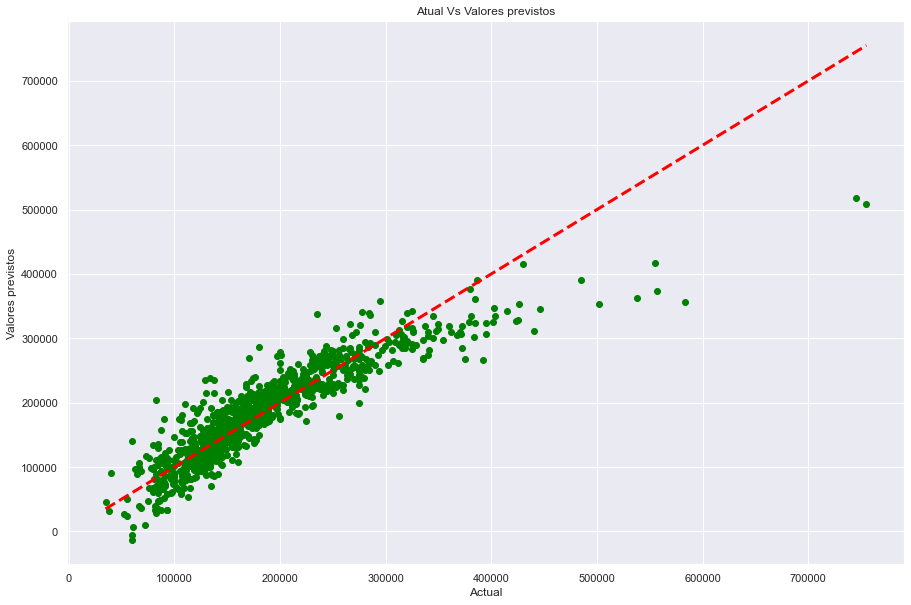

In [394]:
# Plotando o preço atual vs preço previsto

plt.figure(figsize=(15,10))

plt.scatter(y_train, y_pred, c='green')
plt.plot([y_train.min(), y_train.max()], [y_train.min(), y_train.max()], 'k--', c='red', lw=3)
plt.xlabel('Actual')
plt.ylabel('Valores previstos')
plt.title('Atual Vs Valores previstos')

C:\Users\Tuta\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Atual Vs Resíduo')

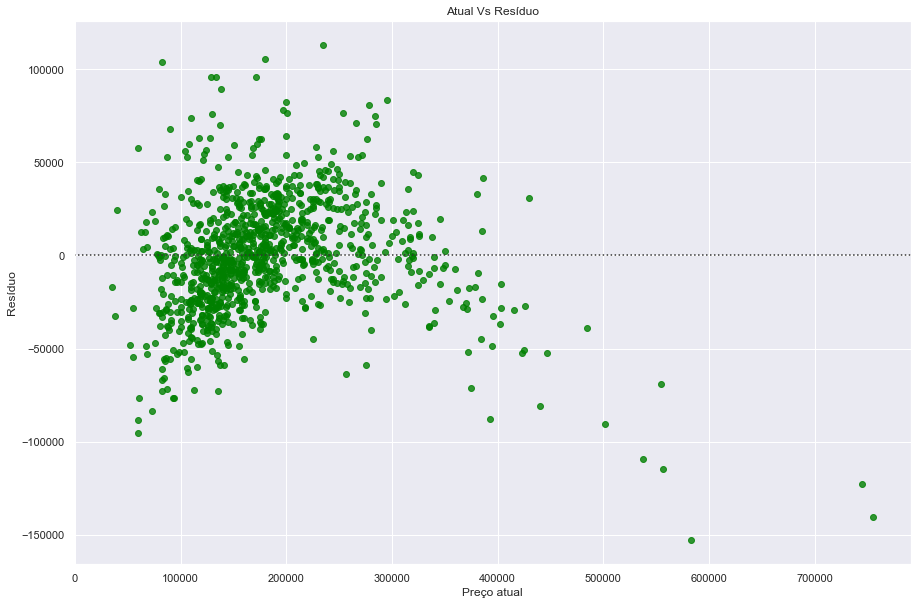

In [395]:
# Plotando os resíduos

plt.figure(figsize=(15,10))

sns.residplot(y_train, y_pred, color='green')
plt.xlabel('Preço atual')
plt.ylabel('Resíduo')
plt.title('Atual Vs Resíduo')

A partir do preço de 400.000,00 a medida que o preço foi aumentando, os resíduos também aumentaram em módulo. Demonstrando uma fragilidade no modelo. Uma possível solução para melhorar ainda mais o modelo seria a exclusão de mais outliers ou acrescentar mais variáveis.

In [396]:
# Passando os coeficientes para um dataframe

Coeff = lm.coef_
Coeff.shape

# Ajustando a dimensão
Coeff = Coeff.reshape(-1,7)


# Criando o dataframe
Coeff_df = pd.DataFrame(Coeff, columns = [X2.columns])

# Visualizando 
Coeff_df

,OverallQual,YearRemodAdd,TotalBsmtSF,GarageCars,FullBath,TotRmsAbvGrd,GrLivArea
0,18431.325721,440.091598,43.60807,13989.004121,-5811.576589,-3231.560725,68.798311


In [397]:
# Realizando previsões                 

# Variáveis

NotaGeral = 8
AnoConst = 2005
CapGarag = 2
QntBanh = 2
QntQuart = 5
AreaConv = 2000
AreaPorao = 1000

# Regression Formula for pred
# y = a + bx + ..   # Where y = price, a = intercept,  b = no. of Visitors and x = coefficient of engine size

# Prediction Calculator
pred1 = (lm.intercept_) + (Coeff_df['OverallQual'].values[0] * NotaGeral) + (Coeff_df['YearRemodAdd'].values[0] * AnoConst) +\
(Coeff_df['TotalBsmtSF'].values[0] * AreaPorao) + (Coeff_df['GarageCars'].values[0] * CapGarag) +\
(Coeff_df['FullBath'].values[0] * QntBanh) + (Coeff_df['TotRmsAbvGrd'].values[0] * QntQuart) +\
(Coeff_df['GrLivArea'].values[0] * AreaConv)

print('A previsão do preço da moradia é de: ', pred1)

A previsão do preço da moradia é de:  [262156.227277]


In [398]:
# Query com as variáveis para comparar os resultados com a base de dados

df.query('OverallQual==8 & YearRemodAdd==2005 & TotalBsmtSF>=1000 & GarageCars>=2 & FullBath>=2 & TotRmsAbvGrd>=5 &\
         GrLivArea>=2000')

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
35,36,60,RL,108.0,13418,Pave,No alley access,Reg,Lvl,AllPub,Inside,Gtl,NridgHt,Norm,Norm,1Fam,2Story,8,5,2004,2005,Gable,CompShg,VinylSd,VinylSd,Stone,132.0,Gd,TA,PConc,Ex,TA,Av,Unf,0,Unf,0,1117,1117,GasA,Ex,Y,SBrkr,1132,1320,0,2452,0,0,3,1,4,1,Gd,9,Typ,1,Gd,BuiltIn,2004.0,Fin,3,691,TA,TA,Y,113,32,0,0,0,0,No pool,No Fence,None,0,9,2006,WD,Normal,309000
65,66,60,RL,76.0,9591,Pave,No alley access,Reg,Lvl,AllPub,Inside,Gtl,NridgHt,Norm,Norm,1Fam,2Story,8,5,2004,2005,Gable,CompShg,VinylSd,VinylSd,BrkFace,344.0,Gd,TA,PConc,Ex,TA,Av,Unf,0,Unf,0,1143,1143,GasA,Ex,Y,SBrkr,1143,1330,0,2473,0,0,2,1,4,1,Gd,9,Typ,1,Gd,BuiltIn,2004.0,RFn,3,852,TA,TA,Y,192,151,0,0,0,0,No pool,No Fence,None,0,10,2007,WD,Normal,317000
305,306,20,RL,80.0,10386,Pave,No alley access,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,1Story,8,5,2004,2005,Gable,CompShg,CemntBd,CmentBd,Stone,246.0,Gd,TA,PConc,Gd,TA,No,GLQ,1464,Unf,0,536,2000,GasA,Ex,Y,SBrkr,2000,0,0,2000,1,0,2,0,3,1,Gd,8,Typ,0,No fireplace,Attchd,2004.0,Fin,3,888,TA,TA,Y,168,0,0,0,0,0,No pool,No Fence,None,0,7,2007,WD,Normal,305900
377,378,60,FV,102.0,11143,Pave,No alley access,IR1,Lvl,AllPub,Corner,Gtl,Somerst,Norm,Norm,1Fam,2Story,8,5,2004,2005,Gable,CompShg,CemntBd,CmentBd,None,0.0,Gd,TA,PConc,Gd,TA,No,Unf,0,Unf,0,1580,1580,GasA,Ex,Y,SBrkr,1580,886,0,2466,0,0,3,0,4,1,Gd,8,Typ,1,Gd,Attchd,2004.0,RFn,2,610,TA,TA,Y,159,214,0,0,0,0,No pool,No Fence,None,0,12,2007,WD,Normal,340000
661,662,60,RL,52.0,46589,Pave,No alley access,IR2,Lvl,AllPub,CulDSac,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,7,1994,2005,Hip,CompShg,VinylSd,VinylSd,BrkFace,528.0,Gd,TA,PConc,Gd,Gd,No,GLQ,1361,Rec,180,88,1629,GasA,Ex,Y,SBrkr,1686,762,0,2448,1,0,2,1,4,1,Gd,8,Typ,1,TA,Attchd,1994.0,RFn,3,711,TA,TA,Y,517,76,0,0,0,0,No pool,No Fence,None,0,7,2009,WD,Normal,402000
753,754,60,RL,80.0,10240,Pave,No alley access,Reg,Lvl,AllPub,Inside,Gtl,NridgHt,Norm,Norm,1Fam,2Story,8,5,2005,2005,Gable,CompShg,VinylSd,VinylSd,BrkFace,178.0,Gd,TA,PConc,Gd,TA,Mn,Unf,0,Unf,0,1030,1030,GasA,Gd,Y,SBrkr,1038,1060,0,2098,0,0,2,1,3,1,Ex,8,Typ,1,Gd,Attchd,2005.0,RFn,3,878,TA,TA,Y,192,52,0,0,0,0,No pool,No Fence,None,0,3,2006,WD,Normal,275500


# 6. Conclusão

Através da técnica de regressão linear por meio dos minimos quadrados foi elaborado um modelo que possui uma boa capacidade preditiva, equivalente à 82% de acurácia. Para alcançar este resultado foram utilizadas as variáveis: 'OverallQual', 'YearRemodAdd', 'TotalBsmtSF', 'GarageCars', 'FullBath', 'TotRmsAbvGrd', 'GrLivArea'. O target da análise foi a variável 'SalePrice'. O dataset apresentou integridade nos dados, sendo necessário somente a exclusão de duas observações "outliers" para um ajuste melhor do modelo. Para os dados faltantes utilizou-se o preenchimento de categoria vazia, ou seja: "None", ou foi realizado uma inclusão aleatória porém com confiabilidade estatística, como foi no caso do preenchimento da variável 'LotFrontage'. Por fim as constatações no decorrer das análises gráficas e correlacionais apontadas no decorrer do trabalho demosntraram sua eficácia alcançando uma previsibilidade muito boa onde as variáveis mais importantes foram: 'OverallQual' e 'GarageCars' contrapondo o que apresentou a árvore de decisão. E finalmente, notou-se que quanto mais ou maior o número de fatores que aumentam a área da moradia, maior será o preço estimado da moradia, seguindo uma linha de preço por m² o que era esperado e serve como certificação do resultado.

# 7. Referências

PENG, Roger D.; MATSUI, Elizabeth. The Art of Data Science: a guide for anyone who works with data. Baltimore: LLC, 2016.

MCKINNEY, Wes. Python para Análise de Dados: tratamento de dados com pandas, numpy e ipython. 2. ed. São Paulo: Novatec, 2018.

MULLER, Andreas C.; GUIDO, Sarah. Introduction to Machine Learning With Python. Sebastopol: O'Reilly, 2016.

WHEELAN, Charles. Estatística: o que é para que serve como funciona. Rio de Janeiro: Zahar, 2016.